In [24]:
# import all necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib as mpl
from datetime import datetime
import numpy as np


In [26]:
#load data

airbnb_df = pd.read_csv('TokyoAirbnb.csv')

In [28]:
airbnb_df.shape

(15009, 34)

In [30]:
airbnb_df.head()

,room_id,scrape_id,host_id,property_type,room_type,country,market,neighbourhood,number_of_reviews,reviews_per_month,...,latitude,longitude,host_location,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,35303,2.020000e+13,151977,Apartment,Private room,Japan,Tokyo,Shibuya Ku,18,0.18,...,35.67152,139.71203,"Shibuya, Tokyo, Japan",94.0,9.0,9.0,9.0,10.0,10.0,9.0
1,197677,2.020000e+13,964081,Apartment,Entire home/apt,Japan,Tokyo,Sumida Ku,165,1.56,...,35.71721,139.82596,Tokyo,95.0,10.0,10.0,10.0,10.0,9.0,10.0
2,289597,2.020000e+13,341577,Apartment,Entire home/apt,Japan,Tokyo,Nerima Ku,113,1.17,...,35.74267,139.65810,"Tokyo, Japan",95.0,9.0,10.0,10.0,9.0,9.0,9.0
3,370759,2.020000e+13,1573631,Apartment,Entire home/apt,Japan,Tokyo,Setagaya Ku,103,1.37,...,35.66443,139.65707,"Imari, Saga, Japan",95.0,10.0,10.0,10.0,10.0,10.0,10.0
4,700253,2.020000e+13,341577,Apartment,Entire home/apt,Japan,Tokyo,Nerima Ku,104,1.12,...,35.74264,139.65832,"Tokyo, Japan",96.0,10.0,10.0,10.0,10.0,9.0,10.0


In [32]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   room_id                         15009 non-null  int64  
 1   scrape_id                       15009 non-null  float64
 2   host_id                         15009 non-null  int64  
 3   property_type                   15009 non-null  object 
 4   room_type                       15009 non-null  object 
 5   country                         15009 non-null  object 
 6   market                          15008 non-null  object 
 7   neighbourhood                   15009 non-null  object 
 8   number_of_reviews               15009 non-null  int64  
 9   reviews_per_month               12366 non-null  float64
 10  calculated_host_listings_count  15009 non-null  int64  
 11  availability_365                15009 non-null  int64  
 12  accommodates                    

In [34]:
airbnb_df.set_index('room_id', inplace=True)
airbnb_df.set_index('host_id', inplace=True)

In [36]:
# convert string date to datetime object
airbnb_df.host_since = pd.to_datetime(airbnb_df.host_since)

In [38]:
airbnb_df = airbnb_df[airbnb_df.price_Yen > 0]
airbnb_df = airbnb_df[airbnb_df.bathrooms >= 1]
airbnb_df = airbnb_df[airbnb_df.bedrooms > 0]
airbnb_df = airbnb_df[airbnb_df.beds > 0]
airbnb_df = airbnb_df[airbnb_df.accommodates > 0]
airbnb_df = airbnb_df[airbnb_df.review_scores_rating > 0]

In [40]:
# replace float values to lower value in bathroom column
airbnb_df['bathrooms'] = airbnb_df.bathrooms.replace(1.5, 1)
airbnb_df['bathrooms'] = airbnb_df.bathrooms.replace(2.5, 2)
airbnb_df['bathrooms'] = airbnb_df.bathrooms.replace(3.5, 3)
airbnb_df['bathrooms'] = airbnb_df.bathrooms.replace(4.5, 4)

In [42]:
# convert accommodates count to int from float
airbnb_df.accommodates = airbnb_df.accommodates.astype('int')
airbnb_df.drop(['scrape_id', 'country', 'market', 'name', 'host_name', 'host_location'], axis=1, inplace=True)
airbnb_df['review_scores_rating'] = airbnb_df['review_scores_rating'].dropna(axis=0)
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10339 entries, 151977 to 43474547
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   property_type                   10339 non-null  object        
 1   room_type                       10339 non-null  object        
 2   neighbourhood                   10339 non-null  object        
 3   number_of_reviews               10339 non-null  int64         
 4   reviews_per_month               10339 non-null  float64       
 5   calculated_host_listings_count  10339 non-null  int64         
 6   availability_365                10339 non-null  int64         
 7   accommodates                    10339 non-null  int32         
 8   bathrooms                       10339 non-null  float64       
 9   bedrooms                        10339 non-null  float64       
 10  beds                            10339 non-null  float64       

In [44]:
airbnb_df.fillna(0, inplace=True)
airbnb_df.shape

(10339, 26)

In [46]:

features_df = airbnb_df.copy()

In [48]:
features_df.price_Yen.count()

10339

In [50]:
features_df.shape

(10339, 26)

In [52]:
room_type_count = features_df.room_type.value_counts()
room_type_count

Entire home/apt    7351
Private room       2083
Hotel room          491
Shared room         414
Name: room_type, dtype: int64

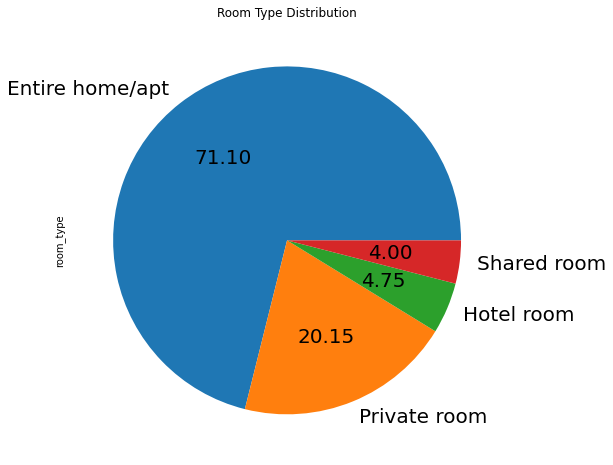

In [54]:
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution');

In [56]:
features_df.property_type.unique()

array(['Apartment', 'House', 'Serviced apartment', 'Condominium',
       'Guest suite', 'Hut', 'Tiny house', 'Townhouse', 'Villa',
       'Aparthotel', 'Nature lodge', 'Loft', 'Hostel', 'Guesthouse',
       'Boutique hotel', 'Ryokan (Japan)', 'Bed and breakfast', 'Hotel',
       'Bungalow', 'Other', 'Dome house', 'Dorm', 'Cabin', 'Earth house',
       'Tent', 'Cottage'], dtype=object)

In [58]:
features_df = features_df[features_df.property_type != 0]
# number of listings based on the property type
property_type_count = features_df.property_type.value_counts()
property_type_count

Apartment             6171
House                 2000
Hostel                 659
Condominium            355
Hotel                  256
Aparthotel             177
Boutique hotel         144
Villa                  130
Serviced apartment     112
Ryokan (Japan)         103
Loft                    44
Guesthouse              39
Hut                     38
Townhouse               32
Tiny house              18
Guest suite             14
Other                   14
Bed and breakfast       12
Cabin                    6
Dome house               4
Nature lodge             4
Bungalow                 3
Dorm                     1
Tent                     1
Earth house              1
Cottage                  1
Name: property_type, dtype: int64

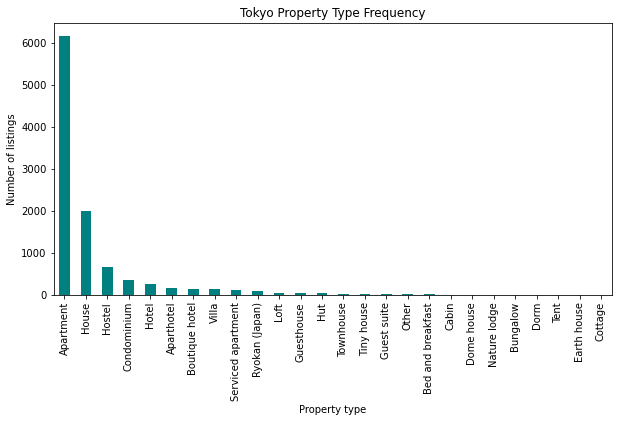

In [59]:
property_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Tokyo Property Type Frequency')
plt.xlabel('Property type');
plt.ylabel('Number of listings');

In [60]:
# analyzing the prices for different room type and property type
price_Yen_data = features_df.groupby(['property_type','room_type']).price_Yen.mean()
price_Yen_data

property_type  room_type      
Aparthotel     Entire home/apt     20549.025641
               Hotel room          16832.056604
               Private room        24210.372093
               Shared room          3869.666667
Apartment      Entire home/apt     30116.063990
                                      ...      
Tiny house     Shared room          2687.000000
Townhouse      Entire home/apt     16555.076923
               Private room         7692.500000
Villa          Entire home/apt    107969.971963
               Private room         8744.391304
Name: price_Yen, Length: 64, dtype: float64

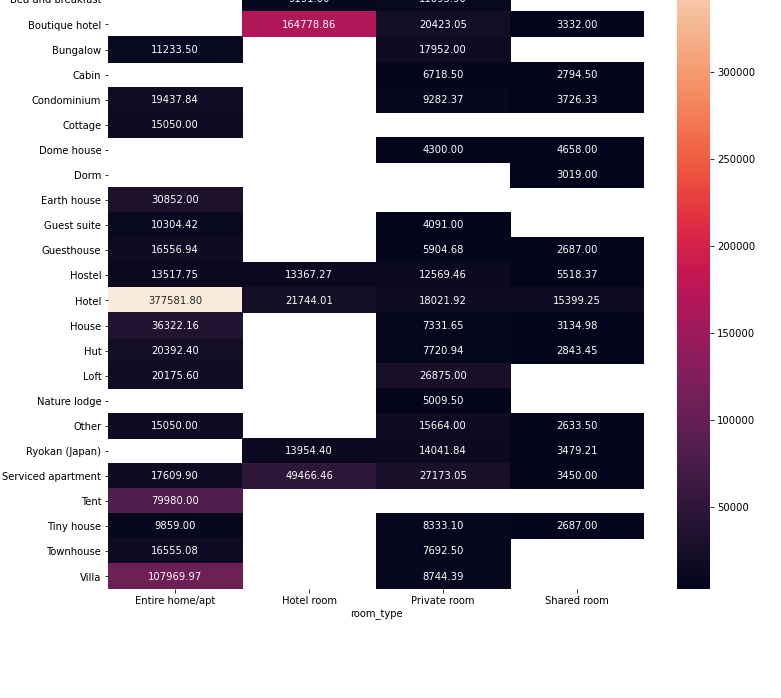

In [61]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['property_type', 'room_type']).price_Yen.mean().unstack(),annot=True, fmt=".2f");

In [62]:
features_df.groupby(['neighbourhood','room_type']).price_Yen.mean()

neighbourhood  room_type      
Adachi Ku      Entire home/apt    14475.471698
               Hotel room          6351.333333
               Private room        3785.670330
               Shared room         6038.000000
Akiruno Shi    Entire home/apt     6261.166667
                                      ...     
Tama Shi       Private room        4421.000000
Toshima Ku     Entire home/apt    39618.002183
               Hotel room          8296.408163
               Private room        6950.455782
               Shared room         3001.458333
Name: price_Yen, Length: 138, dtype: float64

<AxesSubplot:xlabel='room_type', ylabel='neighbourhood'>

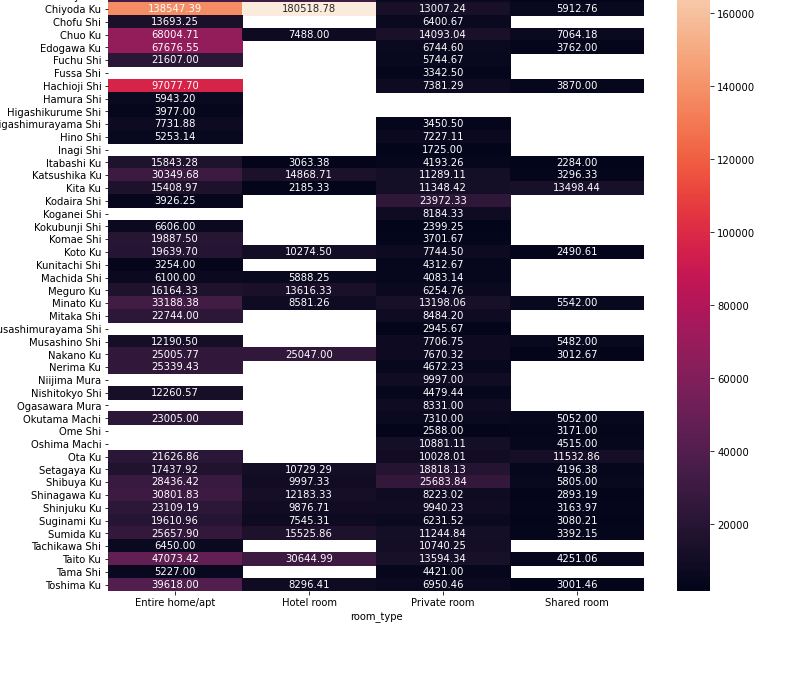

In [63]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['neighbourhood', 'room_type']).price_Yen.mean().unstack(),annot=True, fmt=".2f")

In [64]:
price_per_room_type = features_df.groupby('room_type').price_Yen.mean()
price_per_room_type

room_type
Entire home/apt    31669.326078
Hotel room         29923.708758
Private room       10709.372060
Shared room         4610.550725
Name: price_Yen, dtype: float64

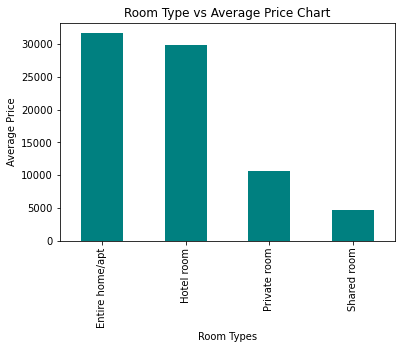

In [65]:
# plot a graph that depicts a relation between room type and price
price_per_room_type.plot(kind='bar', color='teal');
plt.xlabel('Room Types')
plt.ylabel('Average Price')
plt.title('Room Type vs Average Price Chart');

In [66]:
# average price of listings w.r.t neighbourhood
price_per_neighbourhood = features_df.groupby('neighbourhood').price_Yen.mean()
price_per_neighbourhood

neighbourhood
Adachi Ku               7681.000000
Akiruno Shi             5606.461538
Akishima Shi            3870.000000
Arakawa Ku             16169.262590
Bunkyo Ku              26356.438776
Chiyoda Ku             96858.489933
Chofu Shi               8644.538462
Chuo Ku                44227.424242
Edogawa Ku             50527.325843
Fuchu Shi              13675.833333
Fussa Shi               3342.500000
Hachioji Shi           57017.555556
Hamura Shi              5943.200000
Higashikurume Shi       3977.000000
Higashimurayama Shi     6875.600000
Hino Shi                6363.500000
Inagi Shi               1725.000000
Itabashi Ku            10969.703349
Katsushika Ku          26042.975265
Kita Ku                14288.741379
Kodaira Shi            12517.428571
Koganei Shi             8184.333333
Kokubunji Shi           4202.142857
Komae Shi              12950.714286
Koto Ku                15399.814371
Kunitachi Shi           3707.714286
Machida Shi             4835.521739
Meguro Ku     

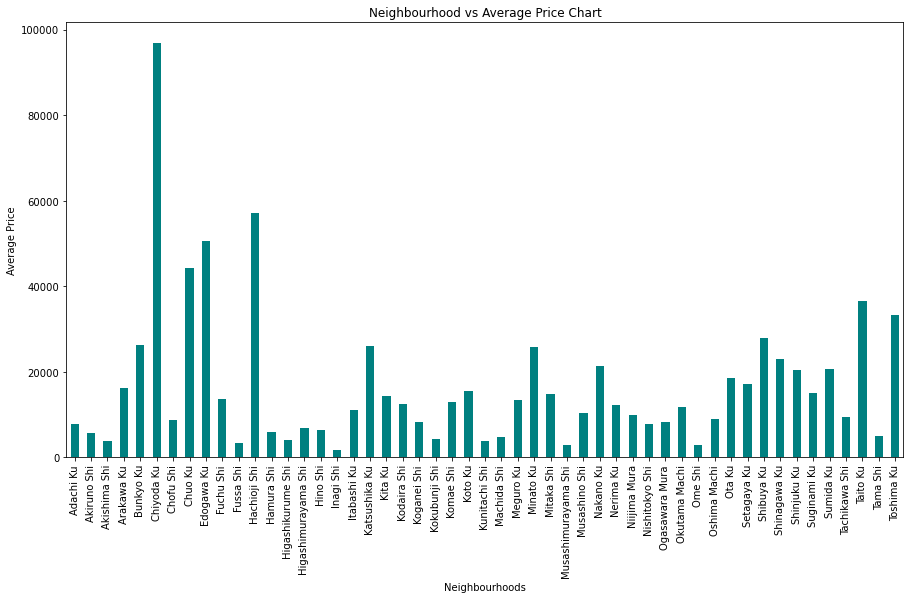

In [67]:
# plot a graph that depicts a relation between neighbourhood and price
plt.figure(figsize=(15,8));
price_per_neighbourhood.plot(kind='bar', color='teal');
plt.xlabel('Neighbourhoods')
plt.ylabel('Average Price')
plt.title('Neighbourhood vs Average Price Chart');

In [68]:
# average price of listings w.r.t property type
price_per_property_type = features_df.groupby('property_type').price_Yen.mean()
price_per_property_type

property_type
Aparthotel            20042.813559
Apartment             27611.651596
Bed and breakfast     10776.750000
Boutique hotel        62289.451389
Bungalow              13473.000000
Cabin                  5410.500000
Condominium           17903.329577
Cottage               15050.000000
Dome house             4568.500000
Dorm                   3019.000000
Earth house           30852.000000
Guest suite            9416.785714
Guesthouse            10192.333333
Hostel                10707.834598
Hotel                 25965.835938
House                 24868.594000
Hut                    9643.631579
Loft                  20327.863636
Nature lodge           5009.500000
Other                 13758.642857
Ryokan (Japan)        12084.902913
Serviced apartment    27240.705357
Tent                  79980.000000
Tiny house             7019.055556
Townhouse             14893.343750
Villa                 90414.676923
Name: price_Yen, dtype: float64

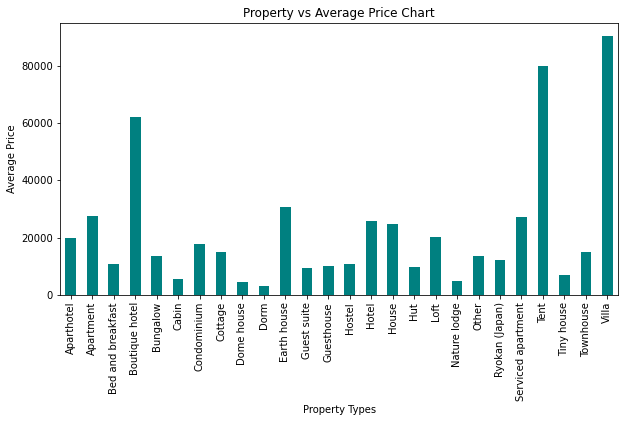

In [69]:
# plot a graph that depicts a relation between property type and price
plt.figure(figsize=(10,5));
price_per_property_type.plot(kind='bar', color='teal');
plt.xlabel('Property Types')
plt.ylabel('Average Price')
plt.title('Property vs Average Price Chart');

In [70]:
features_df.review_scores_rating.unique()

array([ 94.,  95.,  96.,  90.,  99.,  98.,  93., 100.,  88.,  97.,  83.,
        87.,  92.,  91.,  86.,  89.,  85.,  75.,  73.,  82.,  84.,  81.,
        76.,  65.,  80.,  77.,  70.,  60.,  72.,  69.,  68.,  74.,  67.,
        79.,  53.,  78.,  40.,  71.,  66.,  56.,  64.,  50.,  20.,  62.,
        57.,  55.])

In [71]:
ratings_per_neighbourhood = features_df.groupby(
    ['neighbourhood', 'property_type']).review_scores_rating.mean()  
ratings_per_neighbourhood.sort_values(ascending=False)

neighbourhood  property_type    
Bunkyo Ku      Condominium          100.0
Nerima Ku      Guesthouse           100.0
Inagi Shi      House                100.0
Katsushika Ku  Boutique hotel       100.0
Bunkyo Ku      Hut                  100.0
                                    ...  
Musashino Shi  Hostel                75.0
Itabashi Ku    Boutique hotel        70.0
Sumida Ku      Bed and breakfast     67.0
Shinagawa Ku   Hotel                 60.0
Kita Ku        Hotel                 50.0
Name: review_scores_rating, Length: 315, dtype: float64

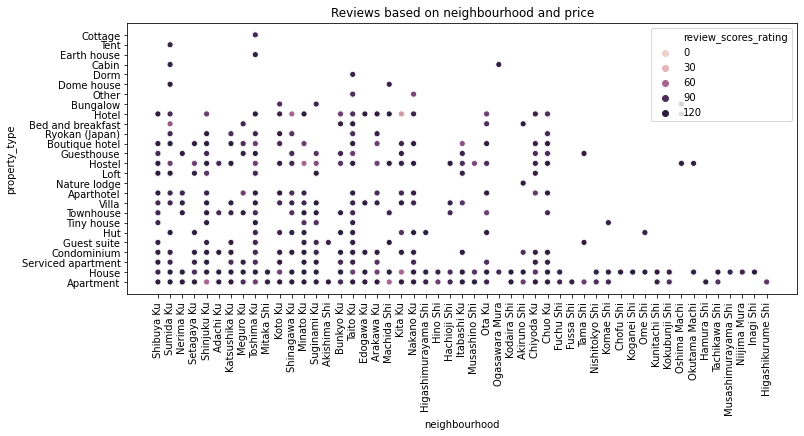

In [72]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x='neighbourhood', y='property_type', hue='review_scores_rating', data=features_df);
plt.xticks(rotation=90);
plt.title('Reviews based on neighbourhood and price');

In [73]:
ratings_per_property_type = features_df.groupby('property_type').review_scores_rating.mean()
ratings_per_property_type

property_type
Aparthotel            94.615819
Apartment             92.464106
Bed and breakfast     92.250000
Boutique hotel        93.423611
Bungalow              93.666667
Cabin                 97.500000
Condominium           93.983099
Cottage               92.000000
Dome house            97.750000
Dorm                  96.000000
Earth house           97.000000
Guest suite           96.357143
Guesthouse            93.743590
Hostel                91.875569
Hotel                 93.714844
House                 93.967000
Hut                   95.394737
Loft                  94.113636
Nature lodge          99.250000
Other                 88.357143
Ryokan (Japan)        92.563107
Serviced apartment    94.107143
Tent                  97.000000
Tiny house            92.222222
Townhouse             94.937500
Villa                 95.630769
Name: review_scores_rating, dtype: float64

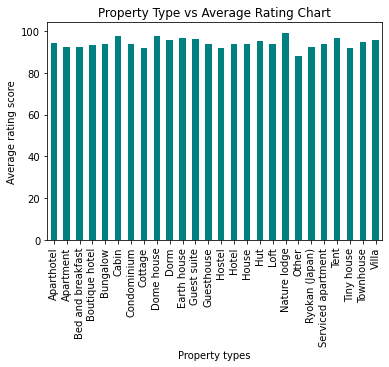

In [74]:
ratings_per_property_type.plot(kind='bar',color='teal');
plt.xlabel('Property types')
plt.ylabel('Average rating score')
plt.title('Property Type vs Average Rating Chart');

(13.5, -0.5)

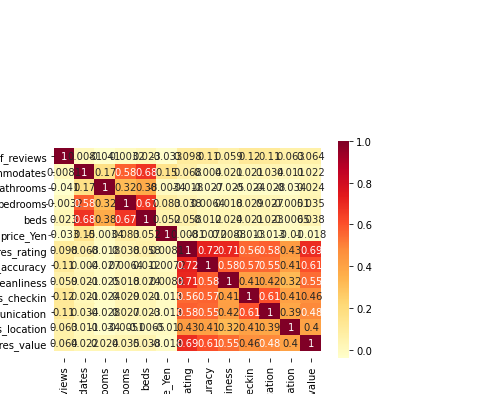

In [75]:
filt = ['number_of_reviews', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price_Yen', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

dfcorr = features_df[filt].corr()

dfheatmap = sns.heatmap(dfcorr, cmap='YlOrRd', annot=True)
bottom, top = dfheatmap.get_ylim()
dfheatmap.set_ylim(bottom + 0.5, top - 0.5)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'price_Yen'),
  Text(1, 0, 'accommodates'),
  Text(2, 0, 'bedrooms'),
  Text(3, 0, 'beds'),
  Text(4, 0, 'review_scores_cleanliness'),
  Text(5, 0, 'review_scores_rating'),
  Text(6, 0, 'bathrooms'),
  Text(7, 0, 'review_scores_accuracy'),
  Text(8, 0, 'review_scores_location'),
  Text(9, 0, 'review_scores_checkin'),
  Text(10, 0, 'review_scores_communication'),
  Text(11, 0, 'review_scores_value'),
  Text(12, 0, 'number_of_reviews')])

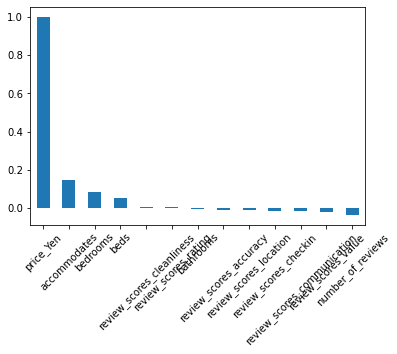

In [76]:
colList_corr = dfcorr.columns

dfcorr=dfcorr.sort_values('price_Yen', ascending=False)
dfcorr['price_Yen'].plot(kind='bar')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'review_scores_rating'),
  Text(1, 0, 'review_scores_accuracy'),
  Text(2, 0, 'review_scores_cleanliness'),
  Text(3, 0, 'review_scores_value'),
  Text(4, 0, 'review_scores_communication'),
  Text(5, 0, 'review_scores_checkin'),
  Text(6, 0, 'review_scores_location'),
  Text(7, 0, 'number_of_reviews'),
  Text(8, 0, 'accommodates'),
  Text(9, 0, 'beds'),
  Text(10, 0, 'bedrooms'),
  Text(11, 0, 'price_Yen'),
  Text(12, 0, 'bathrooms')])

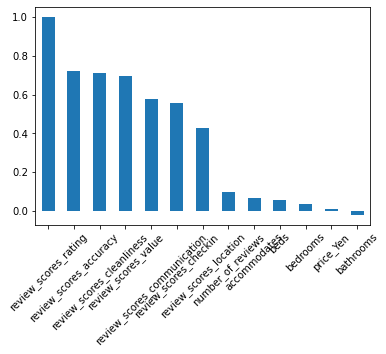

In [77]:
colList_corr = dfcorr.columns

dfcorr=dfcorr.sort_values('review_scores_rating', ascending=False)
dfcorr['review_scores_rating'].plot(kind='bar')
plt.xticks(rotation=45)

(13.5, -0.5)

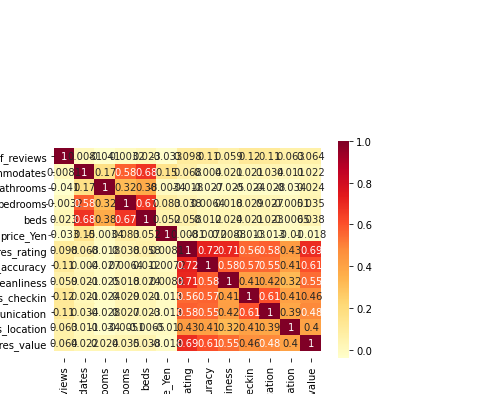

In [78]:
dfcorr_rolling = features_df[filt].corr()

dfcorr_rolling_heatmap = sns.heatmap(dfcorr_rolling, cmap='YlOrRd', annot=True)
bottom, top = dfcorr_rolling_heatmap.get_ylim()
dfcorr_rolling_heatmap.set_ylim(bottom + 0.5, top - 0.5)